Note: Introduction is copied from Towards Data Science blog in Medium
## What is Sentiment Analysis?


Sentiment Analysis is a field of Natural Language Processing responsible for systems that can extract opinions from natural language. NLP targets creating pipelines that can understand language like we humans do. Sentiment analysis is one of the most basic problems in NLP and is usually one of the first problem that students face in a Natural Language Processing domain.

## Why Sentiment Analysis?

From being able to mine opinions from product reviews to being able to forecast stock prices by studying tweets, sentiment analysis has a very wide range of applications. Sentiment Analysis forms the basis for almost every other pipeline in what we call Natural Language Understanding, due to the intuitive nature of the problem.<br>
From an learning point of view, sentiment analysis contains everything that a Data Scientist working in NLP should be aware of. Sentence processing and all the common models/architectures used in NLP can be covered under the umbrella of Sentiment Analysis.<br><br>
**Types of Sentiment Analysis**<br><br>
Sentiment Analysis is essentially a classification problem. While sentiment analysis contains a wide array of problem variety, the most common types can be broadly divided as,
- Polarity Detection : Talking about the polarity of the sentence, that is, positive, negative or neutral. Sometimes the classification can be even more fine tuned, like very positive, positive, neutral, negative and very negative.
- Emotion Detection : Detecting the emotion of the speaker from the sentence, for example, happy, sad, angry etc.
- Intent Detection : Being able to detect not only what is present in the sentence but also its intent.

We will perform Sentiment Analysis using traditional machine learning approach as illustrated below.

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

#Visualization libraries
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#For more info on arguments of seaborn.set()
#https://seaborn.pydata.org/generated/seaborn.set.html

#Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

#Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = (8,5)
#This works as well - plt.rcParams['figure.figsize'] = 8,5
plt.rcParams['image.cmap'] = 'viridis'

import pandas as pd
import numpy as np

## Data Preparation

### Load the Data

We will use a Twitter dataset for this

In [2]:
data_dir = 'data/text_emotion.csv'

In [3]:
old_data = pd.read_csv(data_dir)

### Reading and cleaning the data

In [4]:
old_data.shape

(40000, 4)

In [5]:
#Printing the first few observations
old_data.head()

tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...

In [6]:
old_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


**Observation**

- As seen above, the dataset has 40K rows aka observations/records and 4 columns aka features.
- If we take a close look at `old_data.info()` output, it is evident that the 4 columns are `tweet_id`, `sentiment`, `author` and `content` each containing 40K records. Hence, we can infer that there are no null elements in the dataset.

Since `author` feature won't play a part in predicting sentiment from the content, we can drop that column.

In [7]:
old_data = old_data.drop('author', axis = 1)

In [8]:
#Verifying the above
old_data.head()

tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...

Let's explore the `sentiment` feature!

In [9]:
old_data['sentiment'].nunique()

13

In [10]:
old_data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

From the above, we can conclude that there are 13 unique sentiments listed in the dataset. Let us only consider the records having sentiment(s) as _happiness_ and _sadness_ only for simplicity purpose.<br><br>

If we have to drop the records with other sentiment labels, we can do it in the following ways:<br>

**Method 1**

We can drop rows with rest of the sentiment labels individually like below:

```python
old_data  = old_data.drop(data[data.sentiment == 'anger'].index)
old_data  = old_data.drop(data[data.sentiment == 'boredom'].index)
old_data  = old_data.drop(data[data.sentiment == 'enthusiasm'].index)
old_data  = old_data.drop(data[data.sentiment == 'empty'].index)
old_data  = old_data.drop(data[data.sentiment == 'fun'].index)
old_data  = old_data.drop(data[data.sentiment == 'relief'].index)
old_data  = old_data.drop(data[data.sentiment == 'surprise'].index)
old_data  = old_data.drop(data[data.sentiment == 'love'].index)
old_data  = old_data.drop(data[data.sentiment == 'hate'].index)
old_data  = old_data.drop(data[data.sentiment == 'neutral'].index)
old_data  = old_data.drop(data[data.sentiment == 'worry'].index)
```
**Method 2**

Since we will be deleting rows based on sentiments, what we can do is set `sentiment` feature as index and then drop the records as shown below, followed by re-setting the index,

```python
#If we want to set a particular feature/column as the index while loading the dataset
# old_data = pd.read_csv('data/text_emotion.csv', index_col ="sentiment" )
old_data.set_index('sentiment')

#Drop the records with rest of the sentiment labels
old_data = old_data.drop(["empty" , "neutral" ,"love", "surprise", "fun",
              "relief", "hate", "enthusiasm", "boredom", "anger", "worry"], inplace = True)

#Re-setting the index
old_data.reset_index()
```


But, let's not delete the records instead create a new dataframe `data` with the required `sentiment` labels.

In [11]:
data = old_data[old_data['sentiment'].isin(['happiness','sadness'])]

In [12]:
data.shape

(10374, 3)

In [13]:
data.head()

tweet_id sentiment                                            content
1  1956967666   sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696   sadness                Funeral ceremony...gloomy friday...
6  1956968487   sadness  I should be sleep, but im not! thinking about ...
8  1956969035   sadness            @charviray Charlene my love. I miss you
9  1956969172   sadness         @kelcouch I'm sorry  at least it's Friday?

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10374 entries, 1 to 39998
Data columns (total 3 columns):
tweet_id     10374 non-null int64
sentiment    10374 non-null object
content      10374 non-null object
dtypes: int64(1), object(2)
memory usage: 324.2+ KB


In [15]:
data['sentiment'].nunique()

2

In [16]:
data['sentiment'].value_counts()

happiness    5209
sadness      5165
Name: sentiment, dtype: int64

In [17]:
#To view each sentiment in %
data['sentiment'].value_counts(normalize = True)

happiness    0.502121
sadness      0.497879
Name: sentiment, dtype: float64

<IPython.core.display.Javascript object>


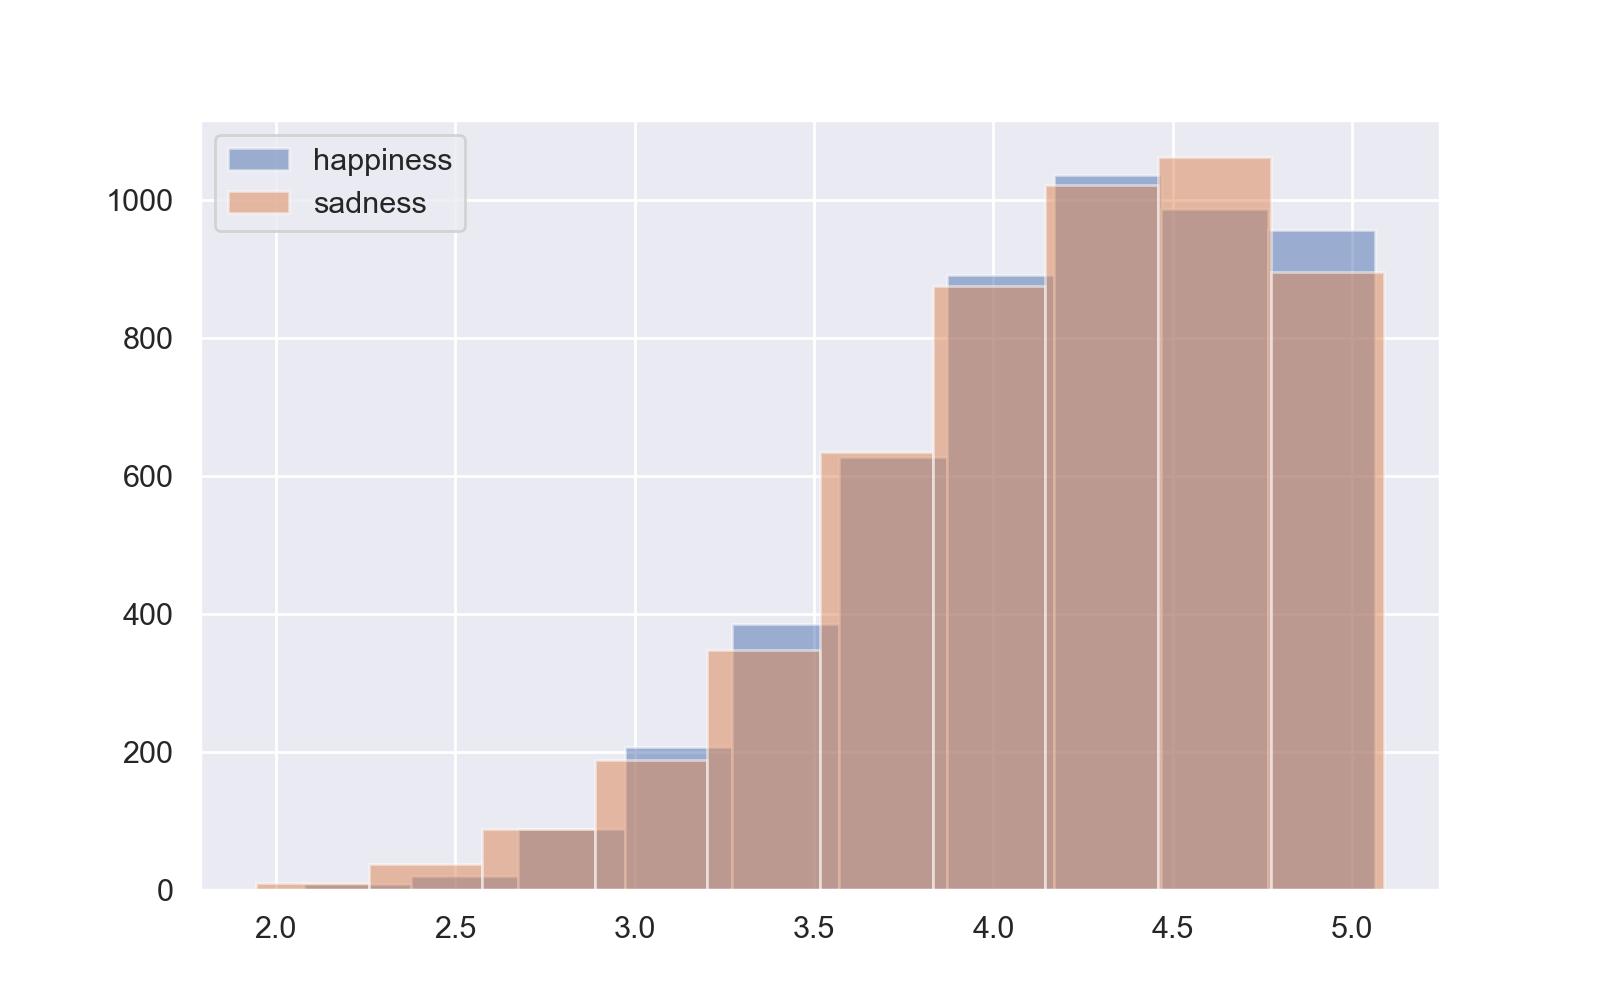

In [18]:
data.loc[data['sentiment'] == 'happiness', 'content'].str.len().apply(np.log1p).hist(label = 'happiness', alpha = .5)
data.loc[data['sentiment'] == 'sadness', 'content'].str.len().apply(np.log1p).hist(label = 'sadness', alpha = .5)
plt.legend();

Hence, we have created a new dataframe with only two sentiments - _happiness_, _sadness_.<br>

**Observation**

- The dataset is nearly balanced with almost equal number of _happiness_ and _sadness_ records.
- The distribution of lengths for _happiness_ and _sadness_ contents is also almost the same.

### Preprocessing the data

The input provided to Sentiment analysis is not all useful. While recent Deep Learning models have promoted shifting all feature engineering to these models, NLP practitioners still prefer cleaning up the input before passing it through any pipeline.<br>When we take a look at the `content` feature of our dataset, we can see that there are a lot of stop words(auxiliary verbs, prepositions, special characters like punctuations and other symbols which we need to eliminate. In order to bring uniformity, we will convert the entire text to lower case.

In [19]:
data['content'].head()

1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
6    I should be sleep, but im not! thinking about ...
8              @charviray Charlene my love. I miss you
9           @kelcouch I'm sorry  at least it's Friday?
Name: content, dtype: object

In [20]:
#Converting the text to lower-case
data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Removing Punctuation, Symbols,
data['content'] = data['content'].str.replace('[^\w\s]',' ')

#Removing Stop Words using NLTK
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [21]:
data['content'].head()

1              layin n bed headache ughhhh waitin call
2                       funeral ceremony gloomy friday
6    sleep im thinking old friend want married damn...
8                         charviray charlene love miss
9                          kelcouch sorry least friday
Name: content, dtype: object

### Lemmatisation

In [4]:
#Lemmatisating 'content'
from textblob import Word
data['content'] = data['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

#Correcting Letter Repetitions
import re
def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)


ModuleNotFoundError: No module named 'textblob'

Next consideration is the idea that if a word is appearing only once in the entire sample of data, then it most likely has no influence in determining the sentiment of the text. Hence we can remove all the rarely occurring words from the dataset which are generally proper nouns and other insignificant words with respect to the current context.

In [23]:
# Code to find the top 10,000 rarest words (modify according to your dataset) 
# appearing in the data
freq = pd.Series(' '.join(data['content']).split()).value_counts()[-10000:]

# Removing all those rarely appearing words from the data
freq = list(freq.index)
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [24]:
data['content'].head()

1                    n bed headache ughhhh waitin call
2                       funeral ceremony gloomy friday
6    sleep im thinking old friend want married damn...
8                                  charviray love miss
9                          kelcouch sorry least friday
Name: content, dtype: object

There are few other obstacles like sarcasm detection, spelling mistakes which need to be taken care of while doing sentiment analysis. Again, we will skip that to keep the model simple. 

### Encoding the target variable

Our goal is to predict the sentiment from the given content. Henceforth, we will pick `sentiment` as our output label.<br><br>
Also, we can’t have text in our data if we’re going to run any kind of model on it. So before we can run a model, we need to make this data ready for the model.<br>
To convert categorical text data into model-understandable numerical data, we will use the `Label Encoder` class. The preference for `Label Encoder` over `One Hot Encoder` is purely because of the fact that we just have two labels(_happiness_ and _sadness_). In order to label encode the `sentiment` column, all we have to do is to import the `LabelEncoder` class from the `sklearn` library, fit and transform the `sentiment` column of the data, and then replace the existing text data with the new encoded data.<br><br>


In [25]:
#Encoding output labels 'sadness' as '1' & 'happiness' as '0'
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(data.sentiment.values)

In [26]:
#Output label 'y' is a numpy array consisting of label-encoded values
y

array([1, 1, 1, ..., 0, 0, 0])

### Splitting the dataset into train and test

Our data didn't come with separate training and test dataset(s), hence we will split our data into the same. Input to the model is `content` feature, while `sentiment` is the target variable.

In [27]:
#Splitting into train and test data in 90:10 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.content.values, y, stratify=y, 
                                                    random_state=38, test_size=0.1, shuffle=True)

Note that if we are not setting `shuffle = True` in `train_test_split`, then we can do the same prior to this step in the following way: 
```python
#Shuffling the dataframe on its indexes
data = data.reindex(np.random.permutation(data.index))
data.head()
```

## Feature Extraction

Now that the dataset is clean, the next step we would like to make sure that the input fed to the machine learning model doesn't contains any text as we know that our machine learning models are mathematical models, thereby needing numerical data.<br>
We will look at the following methods to achieve that,
- TF-IDF
- Count Vectors

### Term Frequency-Inverse Document Frequency (TF-IDF)

This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.<br>
For example “Deep Learning methodologies work well for NLP problems”. Its easy for us to understand the sentence as we know the semantics of the words and the sentence. But how will the computer understand this sentence? The computer can understand any data only in the form of numerical value. So, for this reason we vectorize all of the text so that the computer can understand the text better.

In [28]:
# Extracting TF-IDF parameters
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, analyzer='word',ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.fit_transform(X_test)

### Count Vectors

This is another way we can represent text data numerically: one-hot encoding (or count vectorization).<br>
The idea is very simple, we will be creating vectors that have a dimensionality equal to the size of our vocabulary, and if the text data features that vocab word, we will put a one in that dimension. Every time we encounter that word again, we will increase the count, leaving 0s everywhere we did not find the word even once.<br>
The result of this will be very large vectors, if we use them on real text data, however, we will get very accurate counts of the word content of our text data. Unfortunately, this won’t provide use with any semantic or relational information, but that’s okay since that’s not the point of using this technique.<br>

In [29]:
# Extracting Count Vectors Parameters
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(data['content'])
X_train_count =  count_vect.transform(X_train)
X_test_count =  count_vect.transform(X_test)

## Build, Train, Evaluate the Model

Now our data is model-ready. Since this is basically a classification task, we will discuss the implementation of four machine learning classifiers, namely, Multinomial Naive Bayes Classifier, Linear SVM, Logistic Regression, and Random Forest Classifier. 

### Evaluation Metrics

It is a measure of how our model performs. In general, performance on all metrics is correlated. But, some algorithms may end up doing better or worse in different situations. The practical coding of any metric looks almost exactly the same. The difficulty comes in how to make the choice, not in how to implement it. There are two categories of evaluation metrics, _error metrics_ and _scoring metrics_. Below is a list of metrics for classification problems,<br><br>
**Classification Metrics**<br>
- Error metrics (Accuracy, Precision, Recall)
- Scoring metrics(F1 Score)

In [30]:
#Importing the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score as f1
from sklearn.metrics import roc_curve

### Building the model using TF-IDF vectors

In [31]:
# Model 1: Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test,y_pred)
recall_nb = recall(y_test,y_pred)
precision_nb = precision(y_test,y_pred)
f1_nb = f1(y_test,y_pred)
print('Multinomial Naive Bayes\naccuracy: %.3f\nrecall: %.3f\nprecision: %.3f\nf1_score: %.3f' 
      %(accuracy_nb, recall_nb, precision_nb,f1_nb))

# Model 2: Linear SVM
from sklearn.linear_model import SGDClassifier
lsvm = SGDClassifier(alpha=0.001, random_state=7, max_iter=20, tol=None)
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_test_tfidf)
accuracy_lsvm = accuracy_score(y_test,y_pred)
recall_lsvm = recall(y_test,y_pred)
precision_lsvm = precision(y_test,y_pred)
f1_lsvm = f1(y_test,y_pred)
print('Linear SVM\naccuracy: %.3f\nrecall: %.3f\nprecision: %.3f\nf1_score: %.3f' 
      %(accuracy_lsvm, recall_lsvm, precision_lsvm,f1_lsvm))

# Model 3: logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_test_tfidf)
accuracy_logreg = accuracy_score(y_test,y_pred)
recall_logreg = recall(y_test,y_pred)
precision_logreg = precision(y_test,y_pred)
f1_logreg = f1(y_test,y_pred)
print('Logistic Regression\naccuracy: %.3f\nrecall: %.3f\nprecision: %.3f\nf1_score: %.3f' 
      %(accuracy_logreg, recall_logreg, precision_logreg,f1_logreg))

# Model 4: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)
y_pred = dt.predict(X_test_tfidf)
accuracy_dt = accuracy_score(y_test,y_pred)
recall_dt = recall(y_test,y_pred)
precision_dt = precision(y_test,y_pred)
f1_dt = f1(y_test,y_pred)
print('Decision Tree\naccuracy: %.3f\nrecall: %.3f\nprecision: %.3f\nf1_score: %.3f' 
      %(accuracy_dt, recall_dt, precision_dt,f1_dt))

# Model 5: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test,y_pred)
recall_rf = recall(y_test,y_pred)
precision_rf = precision(y_test,y_pred)
f1_rf = f1(y_test,y_pred)
print('Random Forest\naccuracy: %.3f\nrecall: %.3f\nprecision: %.3f\nf1_score: %.3f' 
      %(accuracy_rf, recall_rf, precision_rf,f1_rf))


Multinomial Naive Bayes
accuracy: 0.521
recall: 0.520
precision: 0.519
f1_score: 0.520
Linear SVM
accuracy: 0.550
recall: 0.636
precision: 0.541
f1_score: 0.585
Logistic Regression
accuracy: 0.537
recall: 0.574
precision: 0.532
f1_score: 0.553
Decision Tree
accuracy: 0.509
recall: 0.373
precision: 0.509
f1_score: 0.431
Random Forest
accuracy: 0.523
recall: 0.468
precision: 0.524
f1_score: 0.494


### How well TF-IDF Vectors performed?

In [32]:
#Importing plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [33]:
#Create a bar for Multinomial Naive Bayes metrics
trace0 = go.Bar(
           x = ['accuracy','recall', 'precision', 'f1_score'],
           y = [accuracy_nb, recall_nb, precision_nb, f1_nb],
           name = 'Multinomial Naive Bayes' 
)

#Create a bar for Linear SVM metrics
trace1 = go.Bar(
          x = ['accuracy','recall', 'precision', 'f1_score'],
          y = [accuracy_lsvm, recall_lsvm, precision_lsvm, f1_lsvm],
          name = 'Linear SVM'
)

#Create a bar for Logistic Regression metrics
trace2 = go.Bar(
           x = ['accuracy','recall', 'precision', 'f1_score'],
           y = [accuracy_logreg, recall_logreg, precision_logreg, f1_logreg],
           name = 'Logistic Regression' 
)

#Create a bar for Decision Tree metrics
trace3 = go.Bar(
           x = ['accuracy','recall', 'precision', 'f1_score', 'f1_score'],
           y = [accuracy_dt, recall_dt, precision_dt, f1_dt],
           name = 'Decision Tree' 
)

#Create a bar for Random Forest metrics
trace4 = go.Bar(
           x = ['accuracy','recall', 'precision', 'f1_score', 'f1_score'],
           y = [accuracy_rf, recall_rf, precision_rf, f1_rf],
           name = 'Random Forest' 
)


#Define the data array
data = [trace0, trace1, trace2, trace3, trace4]

#Set the title
layout = {'title': 'Performance of Machine Learning Classifiers using TF-IDF'}

#Create a 'Figure' and plot it
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link=False)

**Observation** <br>


As we can see none of the models perform great. All the classifiers had accuracy about 50-52%, same goes for precision as well when taken the TF-IDF approach. In terms of recall, Linear SVM has comparatively higher recall than other classifiers whereas Decison tree fares the worst.The reason for poor performance might be due to the length of the content being very short.

### Building the model using Count vectors

In [34]:
# Model 1: Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_count, y_train)
y_pred = nb.predict(X_test_count)
accuracy_nb = accuracy_score(y_test,y_pred)
recall_nb = recall(y_test,y_pred)
precision_nb = precision(y_test,y_pred)
f1_nb = f1(y_test,y_pred)
print('Multinomial Naive Bayes\naccuracy: %.3f\nrecall: %.3f\nprecision: %.3f\nf1_score: %.3f' 
      %(accuracy_nb, recall_nb, precision_nb, f1_nb))

# Model 2: Linear SVM
from sklearn.linear_model import SGDClassifier
lsvm = SGDClassifier(alpha=0.001, random_state=7, max_iter=20, tol=None)
lsvm.fit(X_train_count, y_train)
y_pred = lsvm.predict(X_test_count)
accuracy_lsvm = accuracy_score(y_test,y_pred)
recall_lsvm = recall(y_test,y_pred)
precision_lsvm = precision(y_test,y_pred)
f1_lsvm = f1(y_test,y_pred)
print('Linear SVM\naccuracy: %.3f\nrecall: %.3f\nprecision: %.3f\nf1_score: %.3f' 
      %(accuracy_lsvm, recall_lsvm, precision_lsvm, f1_lsvm))

# Model 3: logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_count, y_train)
y_pred = logreg.predict(X_test_count)
accuracy_logreg = accuracy_score(y_test,y_pred)
recall_logreg = recall(y_test,y_pred)
precision_logreg = precision(y_test,y_pred)
f1_logreg = f1(y_test,y_pred)
print('Logistic Regression\naccuracy: %.3f\nrecall: %.3f\nprecision: %.3f\nf1_score: %.3f' 
      %(accuracy_logreg, recall_logreg, precision_logreg, f1_logreg))

# Model 4: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_count, y_train)
y_pred = dt.predict(X_test_count)
accuracy_dt = accuracy_score(y_test,y_pred)
recall_dt = recall(y_test,y_pred)
precision_dt = precision(y_test,y_pred)
f1_dt = f1(y_test,y_pred)
print('Decision Tree\naccuracy: %.3f\nrecall: %.3f\nprecision: %.3f\nf1_score: %.3f' 
      %(accuracy_dt, recall_dt, precision_dt, f1_dt))

# Model 5: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train_count, y_train)
y_pred = rf.predict(X_test_count)
accuracy_rf = accuracy_score(y_test,y_pred)
recall_rf = recall(y_test,y_pred)
precision_rf = precision(y_test,y_pred)
f1_rf = f1(y_test,y_pred)
print('Random Forest\naccuracy: %.3f\nrecall: %.3f\nprecision: %.3f\nf1_score: %.3f' 
      %(accuracy_rf, recall_rf, precision_rf, f1_rf))

Multinomial Naive Bayes
accuracy: 0.774
recall: 0.781
precision: 0.768
f1_score: 0.775
Linear SVM
accuracy: 0.792
recall: 0.791
precision: 0.791
f1_score: 0.791
Logistic Regression
accuracy: 0.796
recall: 0.797
precision: 0.794
f1_score: 0.795
Decision Tree
accuracy: 0.731
recall: 0.714
precision: 0.738
f1_score: 0.726
Random Forest
accuracy: 0.776
recall: 0.772
precision: 0.778
f1_score: 0.775


### How well Count Vectors performed?

In [35]:
#Create a bar for Multinomial Naive Bayes metrics
trace0 = go.Bar(
           x = ['accuracy','recall', 'precision', 'f1_score'],
           y = [accuracy_nb, recall_nb, precision_nb, f1_nb],
           name = 'Multinomial Naive Bayes' 
)

#Create a bar for Linear SVM metrics
trace1 = go.Bar(
          x = ['accuracy','recall', 'precision', 'f1_score'],
          y = [accuracy_lsvm, recall_lsvm, precision_lsvm, f1_lsvm],
          name = 'Linear SVM'
)

#Create a bar for Logistic Regression metrics
trace2 = go.Bar(
           x = ['accuracy','recall', 'precision', 'f1_score'],
           y = [accuracy_logreg, recall_logreg, precision_logreg, f1_logreg],
           name = 'Logistic Regression' 
)

#Create a bar for Decision Tree metrics
trace3 = go.Bar(
           x = ['accuracy','recall', 'precision', 'f1_score', 'f1_score'],
           y = [accuracy_dt, recall_dt, precision_dt, f1_dt],
           name = 'Decision Tree' 
)

#Create a bar for Random Forest metrics
trace4 = go.Bar(
           x = ['accuracy','recall', 'precision', 'f1_score', 'f1_score'],
           y = [accuracy_rf, recall_rf, precision_rf, f1_rf],
           name = 'Random Forest' 
)


#Define the data array
data = [trace0, trace1, trace2, trace3, trace4]

#Set the title
layout = {'title': 'Performance of Machine Learning Classifiers using Count Vectors'}

#Create a 'Figure' and plot it
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link=False)

**Observation**

- It is evident from the above results that count vectors performed way better than TF-IDF approach as far as this data is concerned. As stated earlier, we will get very accurate counts of the word content of our text data in count vectors approach. Since tweets are of short length, presence of some significant adjectives plays an important factor in determining the sentiment from a given tweet. 
- Coming to the classifiers, apart from Decision Tree the metrics for other classifiers are more or less the same with Logistic Regression again coming out as winner in terms of accuracy, recall, precision and f1_score.

### Random Inputs

Let's now input some random sentences to our model and see how it fares. Since, `Logistic Regression` performed the best, we will consider that model for the below inputs. Also we will take the `count vector` approach into consideration for obvious reasons.

In [36]:
tweets = pd.DataFrame(['I am very happy today! The atmosphere looks cheerful',
'Things are looking great. It was such a good day',
'Success is right around the corner. Lets celebrate this victory',
'Everything is more beautiful when you experience them with a smile!',
'Now this is my worst, okay? But I am gonna get better.',
'I am tired, boss. Tired of being on the road, lonely as a sparrow in the rain. I am tired of all the pain I feel',
'This is quite annoying. I am filled with grief',
'Her betrayal shattered my heart into pieces. It was a terrible day'])

# Preprocessing tweets as done before
tweets[0] = tweets[0].str.replace('[^\w\s]',' ')
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets[0] = tweets[0].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
from textblob import Word
tweets[0] = tweets[0].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Extracting Count Vectors feature from our tweets
tweet_count = count_vect.transform(tweets[0])

#Predicting the emotion of the tweet
tweet_pred = logreg.predict(tweet_count)

print(tweet_pred)

[0 0 0 0 1 1 1 1]


**Observation**

- Since `0` label was for `happiness` and `1` for `sadness`, all the tweets were classified correctly. One can then argue about the low accuracy of our classifiers when the dataset was fed to them, but that is because we haven't had gramatically correct and direct sentences unlike the random inputs. 

## Conclusion

It is safe to conclude that for normal grammatically correct tweets, our model works pretty well. In a similar way, we can detect other emotions as well. Note that we ignored other complexities like sarcasm, spell errors. With more data and other preprocessing techniques we can build better models. Also, we can leverage techniques of classifying sentiments using deep learning(RNN, LSTM).